In [1]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import joblib
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":[10,10]},font_scale=1.2)

In [2]:
#Importing data
df=pd.read_csv("Ecommerce Customers.csv")
#Display part of the data
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
#Data are clean
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [5]:
#Describing the data
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
#Converting columns names to lowercase
df=df.rename(columns=str.lower)

In [7]:
#Making a feature of email service
df["email_service"]=df["email"].apply(lambda e:e.split("@")[1])

In [8]:
df.head()

,email,address,avatar,avg. session length,time on app,time on website,length of membership,yearly amount spent,email_service
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com


In [9]:
#Most people use gmail and hotmail
df.email_service.value_counts().reset_index().rename(columns={"index":"Email_Service","email_service":"Count"})

,Email_Service,Count
0,hotmail.com,87
1,gmail.com,87
2,yahoo.com,76
3,lee.com,2
4,jones.com,2
...,...,...
239,mills-shaffer.com,1
240,little.org,1
241,ramos.net,1
242,jennings.com,1


In [10]:
#Most avatar are CadetBlue,SlateBlue,Cyan,Teal and GreenYellow
df.avatar.value_counts().reset_index().rename(columns={"index":"Avatar","avatar":"Count"})

,Avatar,Count
0,Teal,7
1,Cyan,7
2,SlateBlue,7
3,GreenYellow,7
4,CadetBlue,7
...,...,...
133,PaleGoldenRod,1
134,Red,1
135,PapayaWhip,1
136,MediumPurple,1


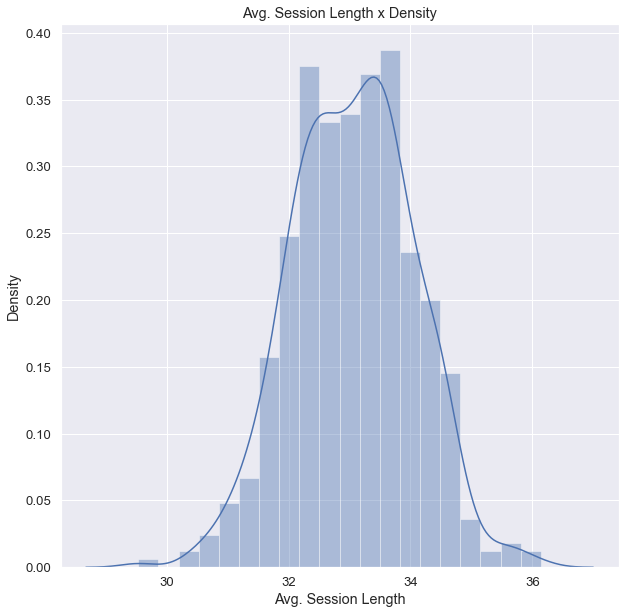

In [11]:
#It seems like normal distribution
sns.distplot(df["avg. session length"],kde=True).set(xlabel="Avg. Session Length")
plt.title("Avg. Session Length x Density")
plt.show()

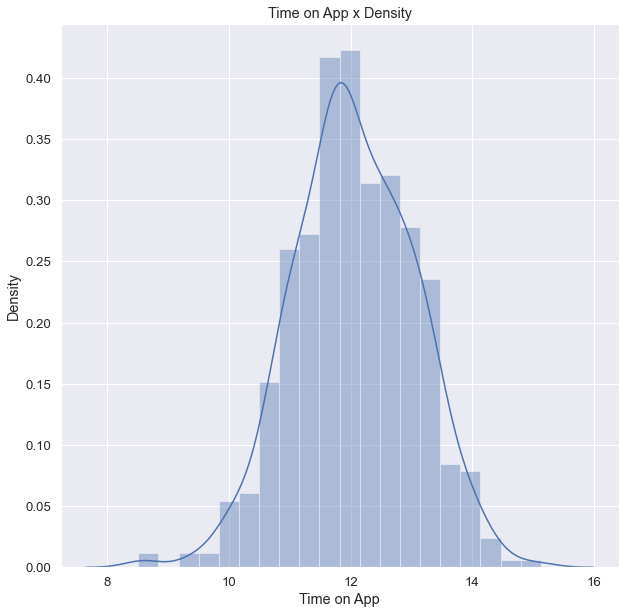

In [12]:
#It seems like normal distribution
sns.distplot(df["time on app"],kde=True).set(xlabel="Time on App")
plt.title("Time on App x Density")
plt.show()

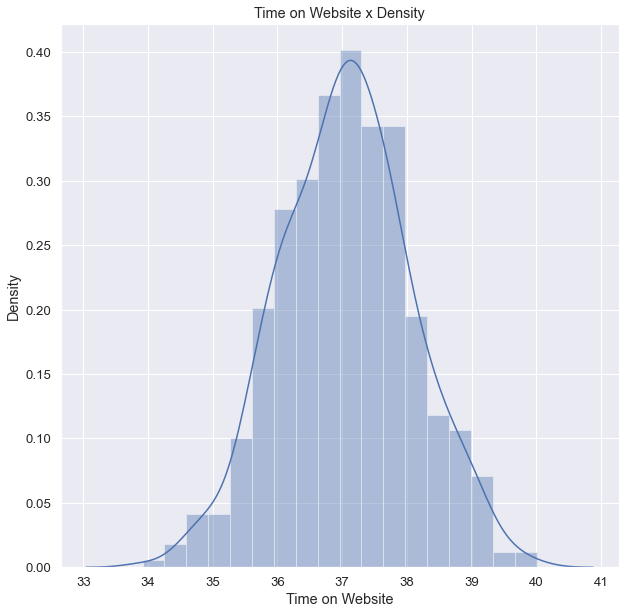

In [13]:
#It seems like normal distribution
sns.distplot(df["time on website"],kde=True).set(xlabel="Time on Website")
plt.title("Time on Website x Density")
plt.show()

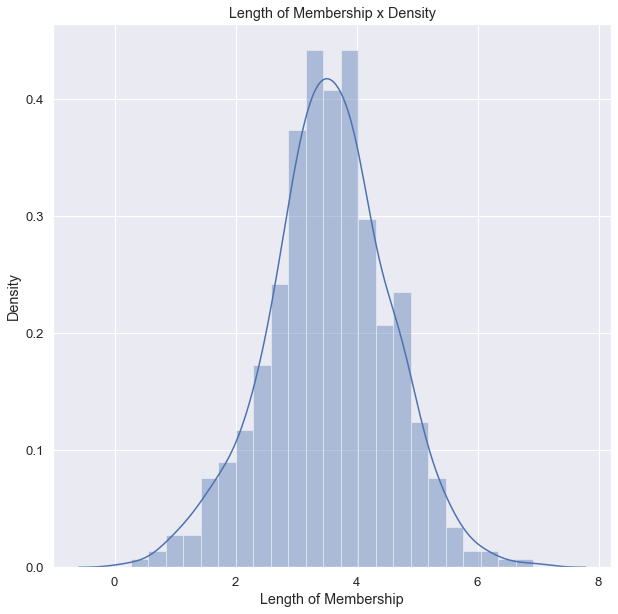

In [14]:
#It seems like normal distribution
sns.distplot(df["length of membership"],kde=True).set(xlabel="Length of Membership")
plt.title("Length of Membership x Density")
plt.show()

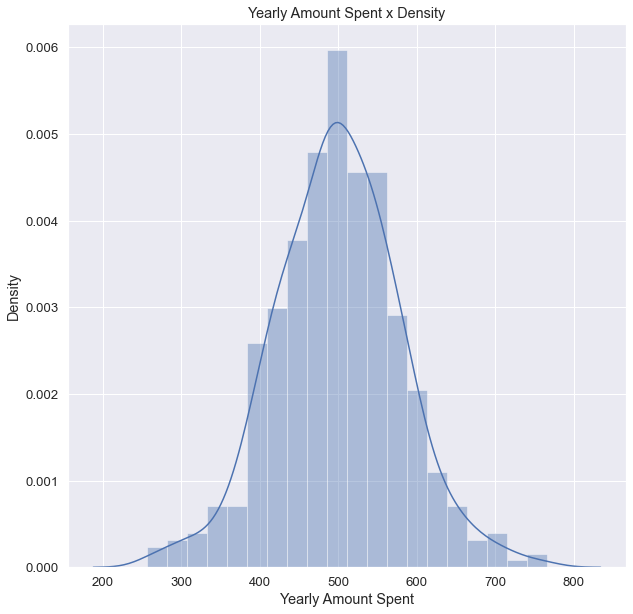

In [15]:
#It seems like normal distribution
sns.distplot(df["yearly amount spent"],kde=True).set(xlabel="Yearly Amount Spent")
plt.title("Yearly Amount Spent x Density")
plt.show()

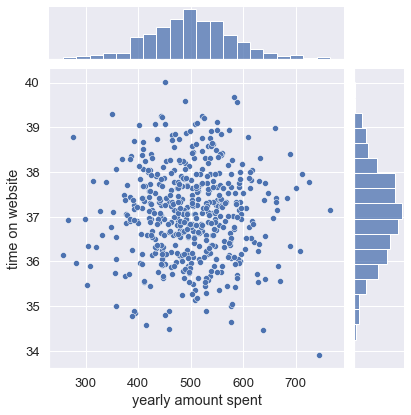

In [16]:
#The distribution seems like normal
#Relation between time on website and yearly amount spent
sns.jointplot(data=df,x="yearly amount spent",y="time on website");

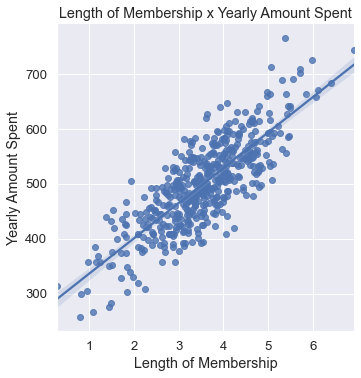

In [17]:
#It seems like they have a high correlation
sns.lmplot(data=df,x="length of membership",y="yearly amount spent")
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.title("Length of Membership x Yearly Amount Spent")
plt.show()

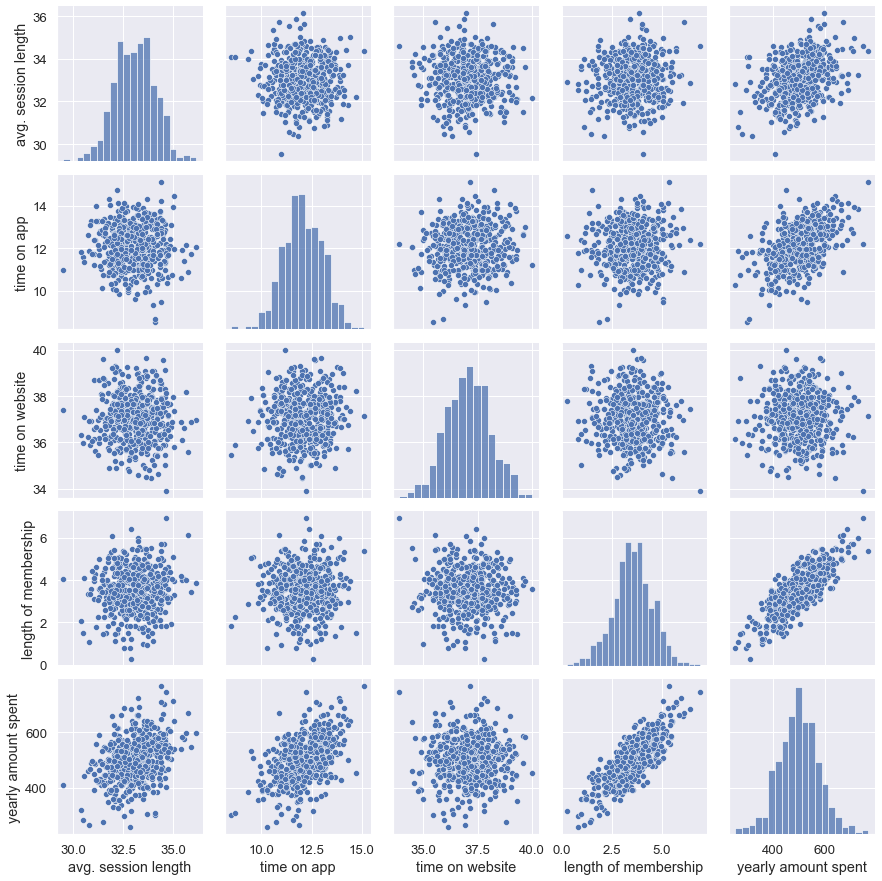

In [18]:
#Discovering the whole dataset
sns.pairplot(df);

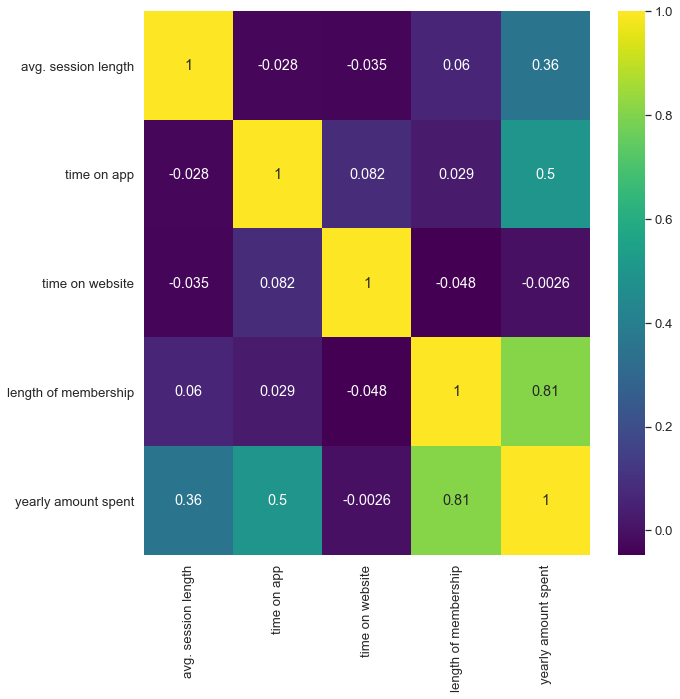

In [19]:
#Correlation between the features
sns.heatmap(df.corr(),annot=True,cmap="viridis");

In [20]:
#Spliting the data for training and testing
x=df[["avg. session length","time on app","time on website","length of membership"]]
y=df["yearly amount spent"]

In [21]:
x.head()

,avg. session length,time on app,time on website,length of membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [22]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: yearly amount spent, dtype: float64

In [23]:
#We use 0.2 from the data for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [24]:
#Applying standard scaling
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [25]:
#Linear regression model
#Make model object
model=LinearRegression()
#Train
model.fit(x_train,y_train)
print("Training score:",model.score(x_train,y_train))
print("Testing score:",model.score(x_test,y_test))

Training score: 0.9851653610080112
Testing score: 0.9794099900139316


In [26]:
#Predicting values
y_pred=model.predict(x_test)
y_pred

array([531.67285384, 423.38997127, 571.96835475, 531.77836344,
       548.74869547, 577.70458359, 525.81407235, 417.96313713,
       516.5989646 , 527.87646663, 460.73043712, 480.60139218,
       542.83475971, 375.42525576, 473.97494567, 542.86941257,
       535.66157136, 616.03826379, 414.51578335, 684.85287807,
       447.51682475, 402.88729334, 457.86125301, 353.01382334,
       535.09752313, 525.79845226, 547.3876985 , 442.05821732,
       580.59333181, 508.92523232, 507.75661174, 540.20666466,
       513.17133172, 523.09397918, 525.20015063, 380.29420223,
       536.3954709 , 479.09662742, 547.64516766, 424.66124358,
       399.1324419 , 489.59756838, 610.67232735, 445.99124132,
       355.08728119, 511.35373945, 493.711557  , 557.35634887,
       585.04497422, 500.11572107, 519.43182001, 446.87012065,
       451.94060378, 466.15476626, 542.99082977, 478.21112814,
       401.14847013, 517.16097124, 562.8086947 , 485.37968405,
       478.87300172, 506.53221675, 601.4405786 , 684.40

In [27]:
#Testing values
y_test

475    535.321610
385    414.935061
167    578.986259
40     532.751788
350    535.480775
          ...    
376    483.796522
317    404.824529
466    577.736025
252    426.154548
135    482.353570
Name: yearly amount spent, Length: 100, dtype: float64

In [28]:
#Mean squared error
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

RMSE: 9.92587927513266


In [29]:
#Deployment
#Saving the model and the scaler
joblib.dump(model,"model.h5")
joblib.dump(scaler,"scaler.h5")
#Loading the model and scaler
model=joblib.load("model.h5")
scaler=joblib.load("scaler.h5")

In [30]:
def main():
    avg_sess_len=float(input("Enter avg. session length: "))
    tim_on_app=float(input("Enter time on app: "))
    tim_on_web=float(input("Enter time on website: "))
    len_of_memb=float(input("Enter length of membership: "))
    data=scaler.transform([[avg_sess_len,tim_on_app,tim_on_web,len_of_memb]])
    print(f"Predictive yearly amount spent:{model.predict(data)}")
    print('-'*40)

In [31]:
#Running
while True:
    try:
        main()
    except:
        print("Please enter valid value")
        continue
    res=input("Do you want to predict again?(y/n): ").lower()
    if res!='y':
        break

Enter avg. session length: 39
Enter time on app: 15
Enter time on website: 40.5
Enter length of membership: 5.3
Predictive yearly amount spent:[876.71713536]
----------------------------------------
Do you want to predict again?(y/n): y
Enter avg. session length: Long time
Please enter valid value
Enter avg. session length: 33
Enter time on app: Long time on app
Please enter valid value
Enter avg. session length: 33
Enter time on app: 13.5
Enter time on website: 40.2
Enter length of membership: 4.99
Predictive yearly amount spent:[645.49380152]
----------------------------------------
Do you want to predict again?(y/n): n
